Nama : Dea Yuliani Sabrina

Dataset ini diambil dari : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/code

**Problem Statements :**


1.   Bagaimana prevalensi diabetes bervariasi berdasarkan kelompok usia dan jenis kelamin?
2.   Berapa rata-rata BMI, kadar glukosa, dan HbA1c pada penderita diabetes vs non-diabetes?
3. Fitur mana yang paling penting dalam memprediksi kemungkinan diabetes?


## Import Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data Understanding

In [21]:
# Load data
df = pd.read_csv("https://raw.githubusercontent.com/deayulianis/Prediksi-Diabetes/refs/heads/main/archive/diabetes_prediction_dataset.csv")


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [24]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [25]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [26]:
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


## Exploratory Data Analysis (EDA)

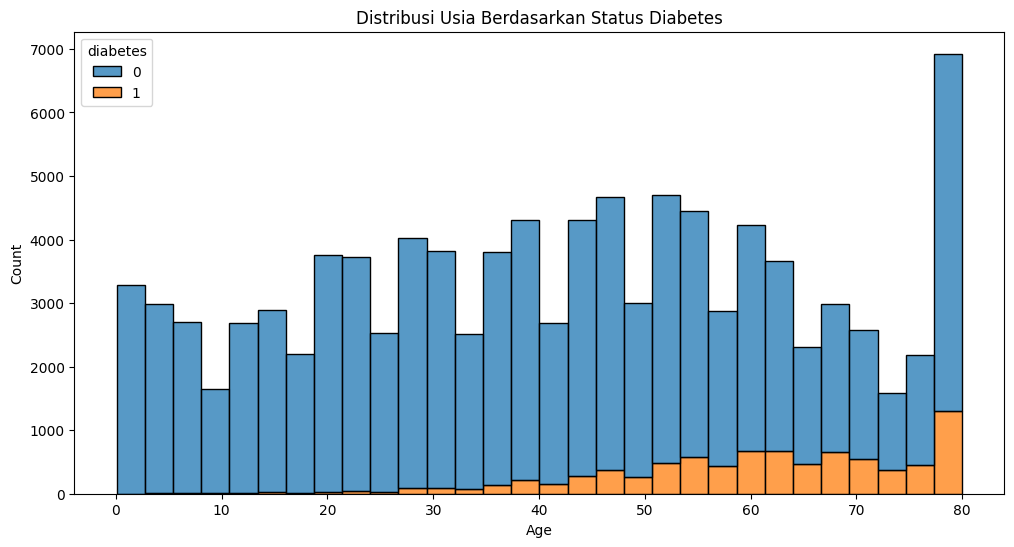

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prevalensi diabetes berdasarkan kelompok usia
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='diabetes', multiple='stack', bins=30)
plt.title('Distribusi Usia Berdasarkan Status Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

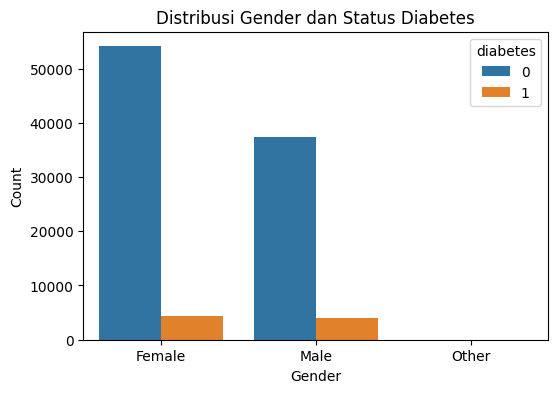

In [32]:
# Prevalensi diabetes berdasarkan kelompok jenis kelamin
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Distribusi Gender dan Status Diabetes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

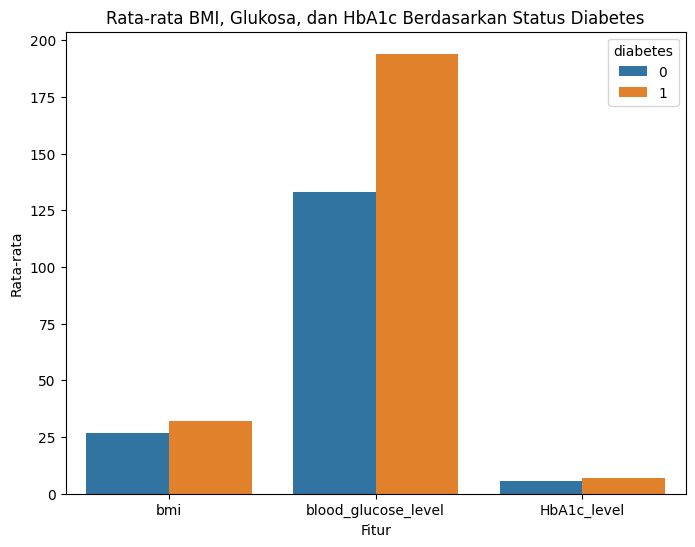

In [29]:
# Rata-rata BMI, kadar glukosa, dan HbA1c pada penderita diabetes vs non-diabetes
mean_values = df.groupby('diabetes')[['bmi', 'blood_glucose_level', 'HbA1c_level']].mean().reset_index()
mean_values = pd.melt(mean_values, id_vars='diabetes', var_name='Fitur', value_name='Rata-rata')

plt.figure(figsize=(8, 6))
sns.barplot(data=mean_values, x='Fitur', y='Rata-rata', hue='diabetes')
plt.title('Rata-rata BMI, Glukosa, dan HbA1c Berdasarkan Status Diabetes')
plt.show()

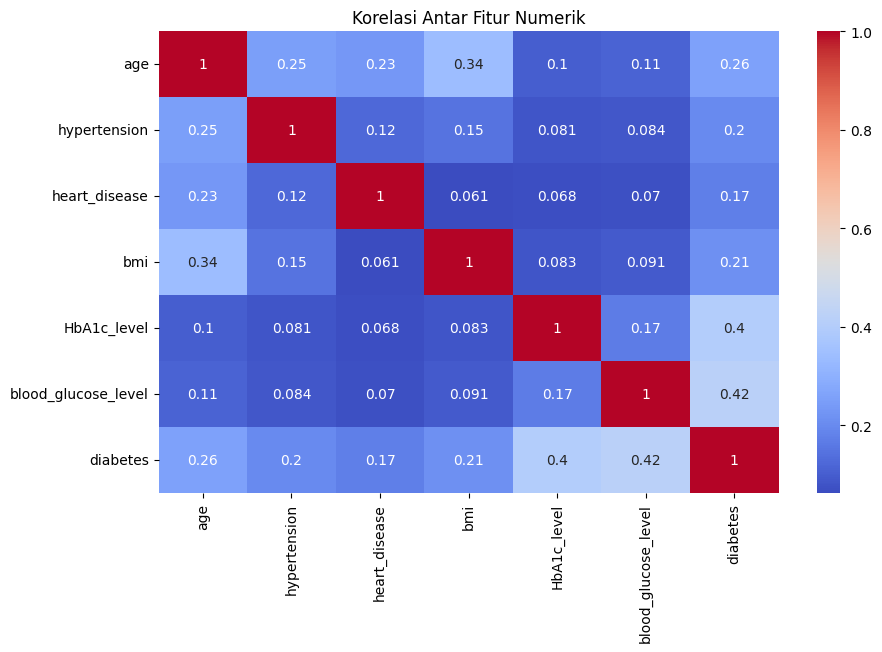

In [30]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

## DATA PREPARATION & CLEANING

In [13]:
# Hapus entri dengan gender "Other"
df = df[df['gender'].isin(['Male', 'Female'])]

# Encode gender
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Encode categorical 'smoking_history' dengan one-hot encoding
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

# Normalisasi fitur numerik
scaler = StandardScaler()
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
    df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
)

<ipython-input-13-123988a9a376>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


## Modeling

In [14]:
# Split data
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Inisialisasi dan latih model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9697454618192729
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.94      0.69      0.79      1700

    accuracy                           0.97     19997
   macro avg       0.96      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



## Evaluation

Pertanyaan 1: Prevalensi berdasarkan usia dan gender

In [15]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '60+'])
pd.crosstab([df['age_group'], df['gender']], df['diabetes'], normalize='index') * 100

diabetes                  0          1
age_group gender                      
<30       0       86.921483  13.078517
          1       82.826067  17.173933

Pertanyaan 2: Rata-rata BMI, Glukosa, dan HbA1c

In [16]:
df.groupby('diabetes')[['bmi', 'blood_glucose_level', 'HbA1c_level']].mean()

,bmi,blood_glucose_level,HbA1c_level
diabetes,,,
0,-0.065346,-0.127898,-0.122140
1,0.703293,1.376515,1.314539


Pertanyaan 3: Fitur terpenting

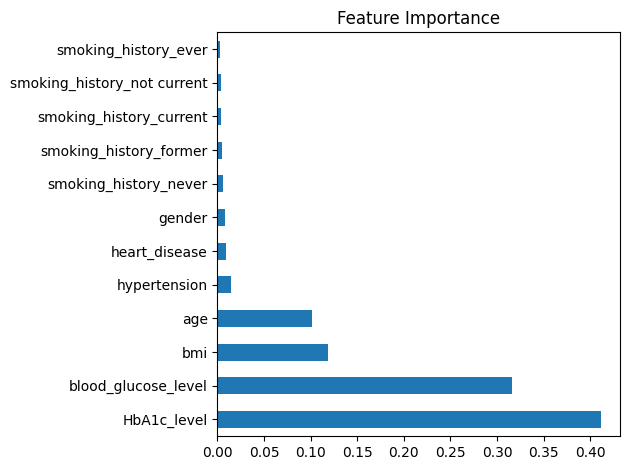

In [17]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', title='Feature Importance')
plt.tight_layout()
plt.show()

**Evaluation**

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9697454618192729


**Classification Report**


In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic'])
print(report)

              precision    recall  f1-score   support

Non-Diabetic       0.97      1.00      0.98     18297
    Diabetic       0.94      0.69      0.79      1700

    accuracy                           0.97     19997
   macro avg       0.96      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



**Feature Importance (Fitur Penting)**

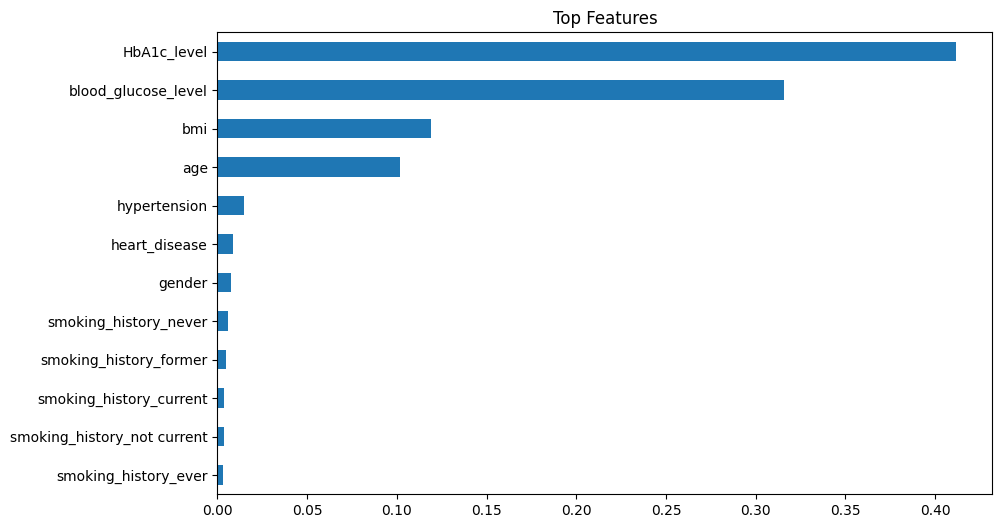

In [20]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title="Top Features")
plt.show()